In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math, copy

In [2]:
np.random.seed(50)
SAMPLES = 100

In [16]:
size = np.random.randint(600,1500, SAMPLES)
bedrooms = np.round(size / ((np.random.random() + 10) * 10)).astype("int_")
floors = np.random.randint(1,4, SAMPLES)
age = np.random.randint(10,80,SAMPLES)
price = size * (np.random.random() * 2) + bedrooms * (np.random.random() * 50 + 10) + floors * (np.random.random() * 50 + 10) - age * (np.random.random() * 7 + 10) + np.random.randint(1,100, SAMPLES)

In [18]:
house_df = pd.DataFrame({
    "Size": size,
    "Bedroom": bedrooms,
    "Floor" : floors,
    "Age": age,
    "Price": price
})

house_df.head()

,Size,Bedroom,Floor,Age,Price
0,1461,15,1,49,2213.443103
1,884,9,3,62,1067.184991
2,761,8,2,75,620.937107
3,1007,10,2,18,1741.042419
4,985,10,2,64,1180.025175


In [19]:
correlation_matrix = house_df.corr()
correlation_matrix

,Size,Bedroom,Floor,Age,Price
Size,1.000000,0.994853,-0.259827,0.054618,0.903997
Bedroom,0.994853,1.000000,-0.245846,0.045146,0.906303
Floor,-0.259827,-0.245846,1.000000,-0.043291,-0.207860
Age,0.054618,0.045146,-0.043291,1.000000,-0.373198
Price,0.903997,0.906303,-0.207860,-0.373198,1.000000


Text(0.5, 1.0, 'Correlation between house components')

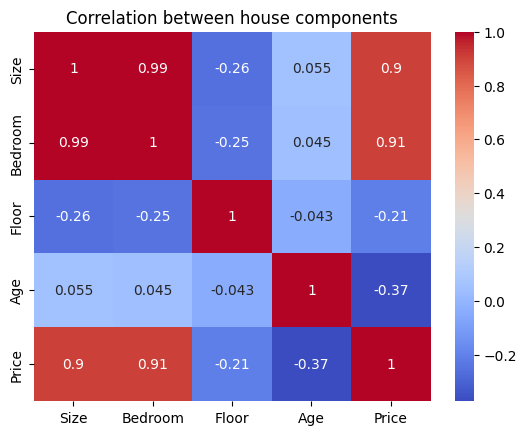

In [20]:
fig, ax = plt.subplots()
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title("Correlation between house components")

In [30]:
def predict (x, w, b):
    """
    Args:
        x (ndarray): shape (m,n) m training examples with n features
        w (ndarray): shape (n) n weights for each feaures
        b (scalar) : bias
    Returns:
        p (ndarray): shape(m) prediction or y_hat
    """
    return np.dot(x, w) + b

In [36]:
def cost_function (x,y,w,b):
    """
    Args:
        x (ndarray): shape(m,n) m training examples with n features
        y (ndarray): shape(m) target values
        w (ndarray): shape(n) n weights for each features
        b (scalar) : bias
    Returns:
        J (scalar): on average how much each prediction is far from the actual value
    """
    m = x.shape[0]
    return (1 / 2 * m) * np.sum(np.square(predict(x,w,b) - y))

In [41]:
def gradient (x,y,w,b):
    """
    Args:
        x (ndarray): shape(m,n) m training examples with n features
        y (ndarray): shape(m) target values
        w (ndarray): shape(n) n weights for each features
        b (scalar) : bias
    Returns:
        dj_dw (ndarray): shape(n) the gradient of the cost w.r.t. parameter w
        dj_db (scalar): the gradient of the cost w.r.t. parameter b
    """
    m , n = x.shape
    y_hat = predict(x,w,b) #shape (m,)
    error = y_hat - y #shape(m,)
    dj_dw = (1 / m) * np.dot(x.T, error)
    dj_db = (1/ m) * np.sum(error)
    return dj_dw , dj_db

In [55]:
def gradient_descent (x, y, w_in, b_in, alpha, num_iter, cost_function, gradient_function, tolerance=1e-6):
    J_history = list()
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iter):
        dj_dw, dj_db = gradient_function(x,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            J_history.append(cost_function(x,y,w,b))
            
        if i % math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i:4d} : cost {J_history[-1]:8.2f}")

        if i > 0 and abs(J_history[-1] - J_history[-2]) < tolerance:
            print(f"Convergece reached at Iteration {i:4d}")
            break
    return w, b, J_history

In [56]:
m,n = house_df.iloc[:, :-1].shape
w_init = np.zeros(n)
b_init = 0
Iterations = 100000
alpha = 0.00000001

w_final , b_final , J_hist = gradient_descent(house_df.iloc[:, :-1].values, house_df.Price.values, w_init, b_init, alpha, Iterations, cost_function, gradient)
print(f"w = {w_final}, b = {b_final:.5f} , Cost {cost_function(house_df.iloc[:, :-1].values, house_df.Price.values, w_final, b_final):.3e}")

Iteration    0 : cost 12963683109.31
Iteration 10000 : cost 287087761.94
Iteration 20000 : cost 260090641.16
Iteration 30000 : cost 235700922.77
Iteration 40000 : cost 213666778.30
Iteration 50000 : cost 193760701.41
Iteration 60000 : cost 175777158.83
Iteration 70000 : cost 159530468.10
Iteration 80000 : cost 144852880.37
Iteration 90000 : cost 131592848.36
w = [ 1.65060421  0.02872602 -0.03288956 -4.33457844], b = -0.01555 , Cost 1.196e+08
